In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
random_value = 42
random.seed(random_value)
np.random.seed(random_value)

In [3]:
class CreateSampleDataset():
    def __init__(self, n_teachers=1000, school_teacher_ratio=1.05, teacher_per_school=15.,
                 std_dev_teacher_per_school=3., min_teachers_per_school=5, p_rural=0.3, p_car=0.7, p_experienced=0.7):
        self.n_teachers = n_teachers
        self.n_schools = int(n_teachers * school_teacher_ratio / teacher_per_school)
        self.teacher_per_school = teacher_per_school
        self.std_dev_teacher_per_school = std_dev_teacher_per_school
        self.min_teachers_per_school = min_teachers_per_school
        self.p_rural = p_rural
        self.p_car = p_car
        self.p_experienced = p_experienced

    def _createTeachers(self):
        x_location = np.random.uniform(0., 1., self.n_teachers)
        y_location = np.random.uniform(0., 1., self.n_teachers)
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=self.n_teachers)
        car = np.random.choice([0, 1], p=[1 - self.p_car, self.p_car], size=self.n_teachers)
        experienced = np.random.choice([0, 1], p=[1 - self.p_experienced, self.p_experienced], size=self.n_teachers)
        teachers = {'x_location': x_location,
                    'y_location': y_location,
                    'rural': rural,
                    'car': car,
                    'experience': experienced,
                    }

        return teachers

    def _createSchools(self):
        x_location = np.random.uniform(0., 1., self.n_schools)
        y_location = np.random.uniform(0., 1., self.n_schools)
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=self.n_schools)
        n_teachers = np.random.normal(loc=self.teacher_per_school, scale=self.std_dev_teacher_per_school, size=self.n_schools).astype(int)
        n_teachers_clipped = np.clip(n_teachers, a_min=self.min_teachers_per_school, a_max=None, out=n_teachers)
        schools = {'ID': range(self.n_schools),
                   'x_location': x_location,
                   'y_location': y_location,
                   'rural': rural,
                   'n_teachers': n_teachers_clipped,
                   }

        return schools

    def make_dataset(self):
        teachers = pd.DataFrame(self._createTeachers())
        schools = pd.DataFrame(self._createSchools())

        return teachers, schools

In [4]:
data = pd.read_csv('Fabi/master_dataset.csv', sep=',')

In [5]:
class CreateNSWDataset():
    def __init__(self, data, n_teachers=54000, school_teacher_ratio=1.05, teacher_per_school=15.,
                 std_dev_teacher_per_school=3., min_teachers_per_school=5, p_rural=0.3, p_car=0.7, p_experienced=0.4):
        self.data = data
        self.n_teachers = int(n_teachers / 1.05)
        self.n_schools = len(data)       
        self.teacher_per_school = teacher_per_school
        self.std_dev_teacher_per_school = std_dev_teacher_per_school
        self.min_teachers_per_school = min_teachers_per_school
        self.p_rural = p_rural
        self.p_car = p_car
        self.p_experienced = p_experienced
        
        #self.loc_teacher = self.__teacher_loc_generator(self.n_teachers, 0.001)
        
    def __teacher_loc_generator(self, n_teacher, p_outliers):
        #biggest cities NSW > 50k population
        # loc = long, lat
        loc = np.array([[151.209444, -33.865],
                        [151.209444, -33.865],
                        [151.209444, -33.865],
                        [151.209444, -33.865],
                        [151.209444, -33.865],
                        [151.209444, -33.865],
                        [151.209444, -33.865],
                        [151.209444, -33.865],
                        [151.209444, -33.865],
                       [151.75, -32.916667],
                       [151.2, -33.3],
                       [150.893915, -34.427243],
                       [151.55, -32.716667],
                       [150.3, -33.7],
                       [153.55, -29.183333],
                       [147.368889, -35.118889],
                       [150.0, -37.5]])

        loc_new = np.resize(loc, (n_teacher,2) )

        loc_new[:,0] += np.random.normal(-0.2, 0.3, size=n_teacher)
        loc_new[:,1] += np.random.normal(0.0, 0.5, size=n_teacher)

        # generate 0% outliers
        loc_new[0:int(n_teacher*p_outliers),0] = 5 * np.random.uniform(143, 154, size=int(n_teacher*p_outliers))
        loc_new[0:int(n_teacher*p_outliers),1] = 5 * np.random.uniform(-36, -29, size=int(n_teacher*p_outliers))

        return loc_new

    def _createTeachers(self):
        loc_school = np.array([data['Longitude'], data['Latitude']]).T
        x_location = loc_school[:,0]
        y_location = loc_school[:,1]
        x_location += np.random.normal(0.0, 0.1, size=len(loc_school))
        y_location += np.random.normal(0.0, 0.5, size=len(loc_school))
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=len(loc_school))
        car = np.random.choice([0, 1], p=[1 - self.p_car, self.p_car], size=len(loc_school))
        experienced = np.random.choice([0, 1], p=[1 - self.p_experienced, self.p_experienced], size=len(loc_school))
        teachers = {'x_location': x_location,
                    'y_location': y_location,
                    'rural': rural,
                    'car': car,
                    'experienced': experienced,
                    }

        return teachers
    
    def _createSchools(self):
        loc_school = np.array([data['Longitude'], data['Latitude']]).T
        x_location = loc_school[:,0]
        y_location = loc_school[:,1]
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=len(loc_school))
        n_teachers = self.data["latest_year_enrolment_FTE"] // self.teacher_per_school
        
        schools = {'ID': range(len(loc_school)),
                   'x_location': x_location,
                   'y_location': y_location,
                   'rural': rural,
                   'n_teachers': n_teachers,
                   }

        return schools

    def make_dataset(self):
        teachers = pd.DataFrame(self._createTeachers())
        schools = pd.DataFrame(self._createSchools())

        return teachers, schools

In [6]:
DatasetSampler = CreateSampleDataset()
teachers, schools = DatasetSampler.make_dataset()
#DatasetSampler = CreateNSWDataset(data)
#teachers, schools = DatasetSampler.make_dataset()

In [7]:
teachers.head()

,x_location,y_location,rural,car,experience
0,0.374540,0.185133,0,1,1
1,0.950714,0.541901,0,1,1
2,0.731994,0.872946,1,0,1
3,0.598658,0.732225,0,1,0
4,0.156019,0.806561,0,1,0


In [8]:
schools.head()

,ID,x_location,y_location,rural,n_teachers
0,0,0.393636,0.552815,0,18
1,1,0.473436,0.740664,0,12
2,2,0.854547,0.485018,0,19
3,3,0.340004,0.085403,1,10
4,4,0.869650,0.972461,0,19


In [9]:
np.random.normal(loc=0., scale=0.1, size=(20, len(teachers), 2)).shape

(20, 1000, 2)

In [10]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

school_per_cluster = 8
n_iterations = 100
min_differences = []
variances = []
# to do: have to add noise to x and y!!!!
scal = np.random.normal(loc=0., scale=0.1, size=(n_iterations, len(teachers), 2))

def custom_loss(x, y):
    return np.sum((x + - y)**2)

# Finding the best random seed for kmeans
for i in range(n_iterations):
    # Kmeans for School-to-Cluster
    X_train = np.array(schools[['x_location', 'y_location']])
    labels = [i for i in range((DatasetSampler.n_schools // school_per_cluster))]
    kmeans = KMeans(n_clusters=(DatasetSampler.n_schools // school_per_cluster), random_state=i)
    preds = kmeans.fit_predict(X_train, labels)
    means = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    schools['cluster'] = cluster_labels
    
    # KNN for Teacher-to-Cluster
    knn = KNeighborsClassifier(n_neighbors=1, metric=custom_loss)
    X_train = means
    y_train = labels
    knn.fit(X_train, y_train)
    X_test = np.array(teachers[['x_location', 'y_location']]) + scal[i]
    preds = knn.predict(X_test)
    teachers['cluster'] = preds
    
    # Apply Metric
    teacher_demand = schools.groupby(by='cluster')['n_teachers'].sum()
    teacher_supply = teachers.groupby(by='cluster')['x_location'].count()
    teachers_difference = teacher_supply - teacher_demand
    teachers_difference_pct = teachers_difference / teacher_demand
    min_difference = min(teachers_difference_pct)
    min_differences.append(min_difference)
    variances.append(teachers_difference_pct.std()**2)

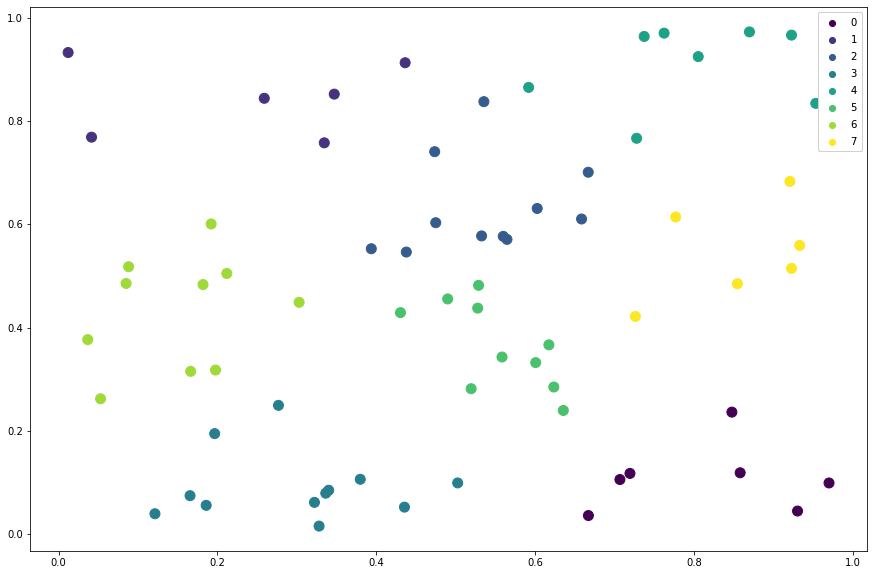

In [11]:
# Do optimized run
best_iteration = np.argmax(np.array(min_differences))
#best_iteration = np.argmin(np.array(variances))
X_train = np.array(schools[['x_location', 'y_location']])
labels = [i for i in range((DatasetSampler.n_schools // school_per_cluster))]
kmeans = KMeans(n_clusters=(DatasetSampler.n_schools // school_per_cluster), random_state=best_iteration)
preds = kmeans.fit_predict(X_train, labels)
means = kmeans.cluster_centers_
schools['cluster'] = preds

#plt.figure(figsize=(15,10))
#plt.scatter(X_train[:, 0], X_train[:, 1], c=preds, cmap='rainbow',)
#plt.scatter(means[:, 0], means[:, 1], c=labels, linewidth=10., cmap='rainbow')
#plt.show()
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=preds, s=100)
legend1 = ax.legend(*scatter.legend_elements())
ax.add_artist(legend1)
plt.show()

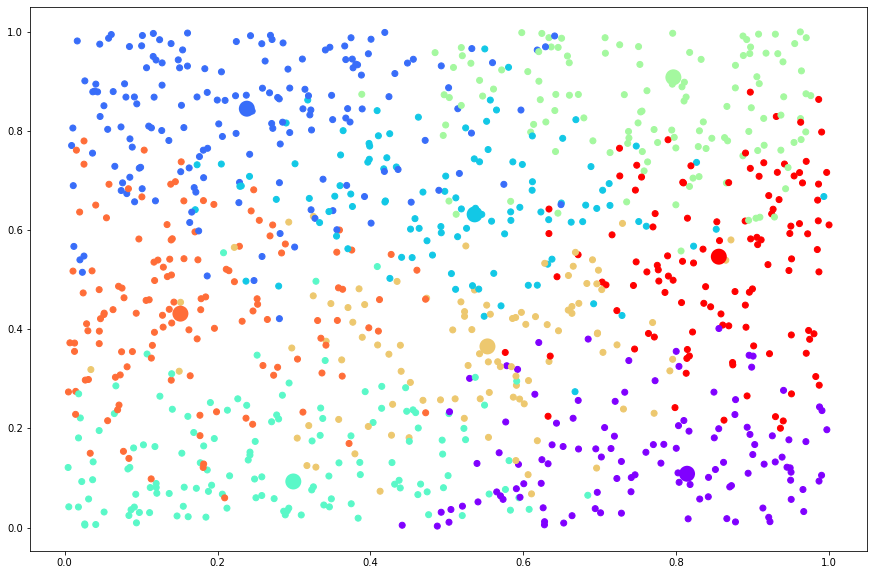

In [18]:
# KNN for Teacher-to-Cluster
knn = KNeighborsClassifier(n_neighbors=1, metric=custom_loss)
X_train = means
y_train = labels
knn.fit(X_train, y_train)
X_test = np.array(teachers[['x_location', 'y_location']])
preds = knn.predict(X_test + scal[i])
teachers['cluster'] = preds

plt.figure(figsize=(15,10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, cmap='rainbow')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, linewidth=10., cmap='rainbow')

In [19]:
# Fill DataFrame
cluster_df = pd.DataFrame({
                           'Cluster ID': labels,
                           'teacher_demand': schools.groupby(by='cluster')['n_teachers'].sum(),
                           'teacher_supply': teachers.groupby(by='cluster')['x_location'].count(),
                           })
cluster_df['teachers_difference'] = cluster_df['teacher_supply'] - cluster_df['teacher_demand']
cluster_df['teachers_difference_pct'] = cluster_df['teachers_difference'] / cluster_df['teacher_demand']

/opt/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


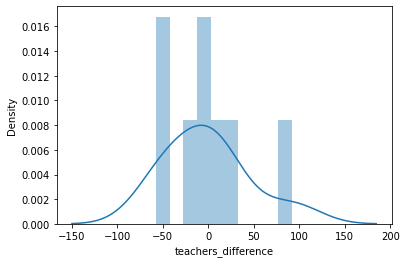

In [20]:
# Absolute Difference
sns.distplot(cluster_df['teachers_difference'], bins=10)

In [21]:
cluster_df

,Cluster ID,teacher_demand,teacher_supply,teachers_difference,teachers_difference_pct
cluster,,,,,
0,0,102,115,13,0.127451
1,1,77,169,92,1.194805
2,2,165,108,-57,-0.345455
3,3,163,136,-27,-0.165644
4,4,127,125,-2,-0.015748
5,5,148,100,-48,-0.324324
6,6,134,132,-2,-0.014925
7,7,94,115,21,0.223404


/opt/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


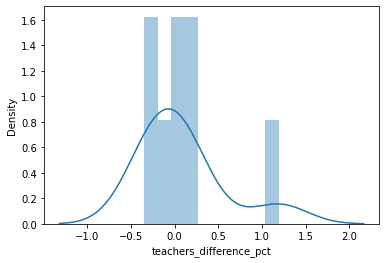

In [22]:
# Relative difference
sns.distplot(cluster_df['teachers_difference_pct'], bins=10)

/opt/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


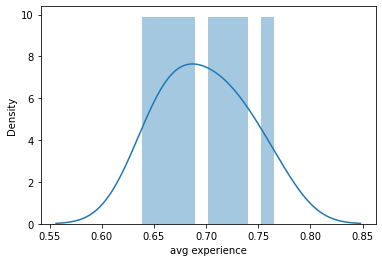

In [23]:
# Get avg experience (is center around 0.7 see class)
cluster_df['avg experience'] = teachers.groupby(by='cluster')['experience'].mean()
sns.distplot(cluster_df['avg experience'], bins=10)